In [82]:
# Python program to illustrate HoughLine
# method for line detection
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [47]:
imgPath = "/Users/kunal/Documents/VdartResumeProject/VisionAPi/Document_619_1.jpg"

# Lines

In [17]:
import numpy as np
import sys
import cv2
def show_wait_destroy(winname, img):
    img = cv2.resize(img, (960, 540))   
    cv.imshow(winname, img)
    cv.moveWindow(winname, 500, 0)
    cv.waitKey(0)
    cv.destroyWindow(winname)

In [18]:
def calculateLocationOfLines(picMatrix, horizontal):
    lstofLines = []
    rowNum = 0
    picMatrix = picMatrix if horizontal else picMatrix.T
    for row in picMatrix:
        if any(row) != 0:
            ctStart = 0
            distance = 0
            linePos = False
            for columnSingle in row:
                if columnSingle == 0:
                    ctStart+=1
                    linePos = True
                else:
                    distance+=1
            lstofLines.append([rowNum, ctStart,ctStart+distance, distance])
        rowNum+=1
    return lstofLines

In [19]:
def img2HorizontalLines(horizontal):
    # Specify size on horizontal axis
    cols = horizontal.shape[1]
    horizontal_size = cols // 30
    # Create structure element for extracting horizontal lines through morphology operations
    horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 1))
    # Apply morphology operations
    horizontal = cv2.erode(horizontal, horizontalStructure)
    horizontal = cv2.dilate(horizontal, horizontalStructure)
    # Show extracted horizontal lines
    #show_wait_destroy("horizontal", horizontal)
    return horizontal

In [20]:
def checkIfImgExists(img):
    # Load the image
    src = cv2.imread(img, cv2.IMREAD_COLOR)
    # Check if image is loaded fine
    if src is None:
        print('Error opening image: ' + img)
        raise Exception("ERROR")
    # Show source image
    #cv2.imshow("src", src)
    return src

In [21]:
def findHorizontalLines(img, display):
    src = checkIfImgExists(img)
    # Transform source image to gray if it is not already
    if len(src.shape) != 2:
        gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    else:
        gray = src
    # Show gray image
    #show_wait_destroy("gray", gray)
    # Apply adaptiveThreshold at the bitwise_not of gray, notice the ~ symbol
    gray = cv2.bitwise_not(gray)
    bw = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
                                cv2.THRESH_BINARY, 15, -2)
    # Show binary image
    #show_wait_destroy("binary", bw)
    if display:
        plt.imshow(bw)
        plt.show()
    # [bin]
    # [init]
    # Create the images that will use to extract the horizontal and vertical lines
    horizontal = np.copy(bw)
    
    horizontalConverted = img2HorizontalLines(horizontal)
    
    if display:
        plt.imshow(horizontalConverted)
        plt.show()
    lstofLinesHorizontal = calculateLocationOfLines(horizontalConverted, True)
    print("YPos - Starting - Ending - Distance")
    return lstofLinesHorizontal

In [22]:
def img2VerticalLines(vertical):
    # Specify size on vertical axis
    rows = vertical.shape[0]
    verticalsize = rows // 30
    # Create structure element for extracting vertical lines through morphology operations
    verticalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, verticalsize))
    # Apply morphology operations
    vertical = cv2.erode(vertical, verticalStructure)
    vertical = cv2.dilate(vertical, verticalStructure)
    # Show extracted vertical lines
    #show_wait_destroy("vertical", vertical)
    return vertical

In [23]:
def findVerticalLines(img, display):
    src = checkIfImgExists(img)
    # Transform source image to gray if it is not already
    if len(src.shape) != 2:
        gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    else:
        gray = src
    # Show gray image
    #show_wait_destroy("gray", gray)
    # Apply adaptiveThreshold at the bitwise_not of gray, notice the ~ symbol
    gray = cv2.bitwise_not(gray)
    bw = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
                                cv2.THRESH_BINARY, 15, -2)
    # Show binary image
    #show_wait_destroy("binary", bw)
    if display:
        plt.imshow(bw)
        plt.show()
    # [bin]
    # [init]
    # Create the images that will use to extract the horizontal and vertical lines
    vertical = np.copy(bw)
    
    verticalConverted = img2VerticalLines(vertical)
    
    if display:
        plt.imshow(verticalConverted)
        plt.show()
    lstofLinesVertical = calculateLocationOfLines(verticalConverted, False)
    print("YPos - Starting - Ending - Distance")
    #return lstofLinesVertical, verticalConverted
    return verticalConverted

In [103]:
vertical = findVerticalLines(imgPath, False)

YPos - Starting - Ending - Distance


In [100]:
horz = findHorizontalLines(imgPath, False)
#print(horz)

YPos - Starting - Ending - Distance


In [43]:
similar = []
for i in horz:
    similar.append(i[0])

In [85]:
rowNums = []
for i in range(len(horz)):
    rowNums.append("Line " + str(i+1))

In [87]:
dfHorzLines = pd.DataFrame(horz, index = rowNums, columns= ["YPos","Starting","Ending","Distance"])

In [88]:
dfHorzLines

YPos  Starting  Ending  Distance
Line 1      79      1349    1653       304
Line 2      80      1348    1653       305
Line 3      81      1378    1653       275
Line 4      82      1387    1653       266
Line 5      83      1453    1653       200
...        ...       ...     ...       ...
Line 189  2135      1388    1653       265
Line 190  2136      1388    1653       265
Line 191  2137      1388    1653       265
Line 192  2138      1388    1653       265
Line 193  2139      1388    1653       265

[193 rows x 4 columns]

In [111]:
vert = []
countLinesVert = 0
for i in vertical:
    if any(i) != 0:
        countNumsInEachRow = 0
        for j in i:
            if j != 0:
                endingPos = j
                countNumsInEachRow +=1
        vert.append([countLinesVert, endingPos-countNumsInEachRow, endingPos, endingPos- (endingPos-countNumsInEachRow)])
    countLinesVert+=1

In [113]:
colsNumsVert = []
for i in range(len(vert)):
    colsNumsVert.append("Column " + str(i+1))

In [114]:
dfVertLines = pd.DataFrame(vert, index = colsNumsVert, columns= ["YPos","Starting","Ending","Distance"])

In [115]:
dfVertLines

YPos  Starting  Ending  Distance
Column 1      78       254     255         1
Column 2      79       243     255        12
Column 3      80       243     255        12
Column 4      81       243     255        12
Column 5      82       243     255        12
...          ...       ...     ...       ...
Column 468  2135       241     255        14
Column 469  2136       241     255        14
Column 470  2137       241     255        14
Column 471  2138       241     255        14
Column 472  2139       241     255        14

[472 rows x 4 columns]

In [80]:
img

# Rounded rectangle

In [29]:
from PIL import Image, ImageDraw

In [30]:
def round_corner(radius, color):
    """Draw a round corner"""
    corner = Image.new('RGBA', (radius, radius), (0, 0, 0, 0))
    draw = ImageDraw.Draw(corner)
    draw.pieslice((0, 0, radius * 2, radius * 2), 180, 270, fill=color)
    return corner
def apply_grad_to_corner(corner, color, backwards = False, topBottom = False):
    width, height = corner.size
    widthIter = range(width)
    for i in range(height):
        gradPos = 0
    for j in widthIter:
        if topBottom:
            pos = (i,j)
        else:
            pos = (j,i)
        pix = corner.getpixel(pos)
        gradPos+=1
        if pix[3] != 0:
            corner.putpixel(pos,color)
    return corner

In [31]:
def create4curvedCorners(widthBox, heightBox, radius, color, TRANSPARENCY):
    """Draw a rounded rectangle"""
    OPACITY = int(255 * TRANSPARENCY)
    gradient = color + (OPACITY,)
    width, height = (widthBox, heightBox)
    rectangle = Image.new('RGBA', (width, height), (0, 0, 0)+(OPACITY,))
    origCorner = round_corner(radius, color+(OPACITY,))
    corner = origCorner
    rectangle = Image.new('RGBA', (widthBox, heightBox))
    apply_grad_to_corner(corner,gradient,False)
    rectangle.paste(corner, (0, 0))
    corner = origCorner.rotate(90)
    apply_grad_to_corner(corner,gradient,False)
    rectangle.paste(corner, (0, height - radius))
    corner = origCorner.rotate(180)
    apply_grad_to_corner(corner,gradient,True)
    rectangle.paste(corner, (width - radius, height - radius))
    corner = origCorner.rotate(270)
    apply_grad_to_corner(corner,gradient,True)
    rectangle.paste(corner, (width - radius, 0))
    #display(rectangle)
    return rectangle

In [32]:
def pastMatrixonImg(matrix, radius):
    ctPlus = 0
    matrix = ((matrix[0][0]-ctPlus, matrix[0][1]-ctPlus), (matrix[1][0]+ctPlus, matrix[1][1]-ctPlus), 
              (matrix[2][0]+ctPlus, matrix[2][1]+ctPlus), (matrix[3][0]-ctPlus, matrix[3][1]+ctPlus))
    box1 = ((matrix[0][0]+radius, matrix[0][1]), (matrix[1][0]-radius, matrix[1][1]), 
            (matrix[2][0]-radius, matrix[2][1]), (matrix[3][0]+radius, matrix[3][1]))
    box2 = ((matrix[0][0]+radius, matrix[0][1]+radius), (matrix[0][0], matrix[0][1]+radius),
           (matrix[3][0], matrix[3][1]-radius), (matrix[3][0]+radius, matrix[3][1]-radius))
    box3 = ((matrix[1][0]-radius, matrix[1][1]+radius), (matrix[1][0], matrix[1][1]+radius),
           (matrix[2][0], matrix[2][1]-radius), (matrix[2][0]-radius, matrix[2][1]-radius))
    #draw.polygon(box1, fill=shadeColor+(OPACITY,))
    #draw.polygon(box2, fill=shadeColor+(OPACITY,))
    #draw.polygon(box3, fill=shadeColor+(OPACITY,))
    return box1, box2, box3

In [33]:
def shadeCuveredRectangle(matrix, shadeColor, imgPath):
    TRANSPARENCY = 0.25
    OPACITY = int(255 * TRANSPARENCY)
    imagePath = imgPath
    img = Image.open(imagePath)
    img = img.convert("RGBA")
    overlay = Image.new('RGBA', img.size, shadeColor+(0,))
    draw = ImageDraw.Draw(overlay)  # Create a context for drawing things on it.
    radius=10
    
    box1, box2, box3 = pastMatrixonImg(matrix, radius)
    draw.polygon(box1, fill=shadeColor+(OPACITY,))
    draw.polygon(box2, fill=shadeColor+(OPACITY,))
    draw.polygon(box3, fill=shadeColor+(OPACITY,))
    
    widthBox = matrix[1][0]-matrix[0][0]
    heightBox = matrix[2][1]-matrix[0][1]
    position = (matrix[0])
    rectangle = create4curvedCorners(widthBox, heightBox, radius, shadeColor, TRANSPARENCY)
    img.paste(rectangle, position, mask=rectangle)
    
    img = Image.alpha_composite(img, overlay)
    img = img.convert("RGB") # Remove alpha for saving in jpg format.
    im1 = img.crop((0,56,1000,175))
    #display(im1)
    return img

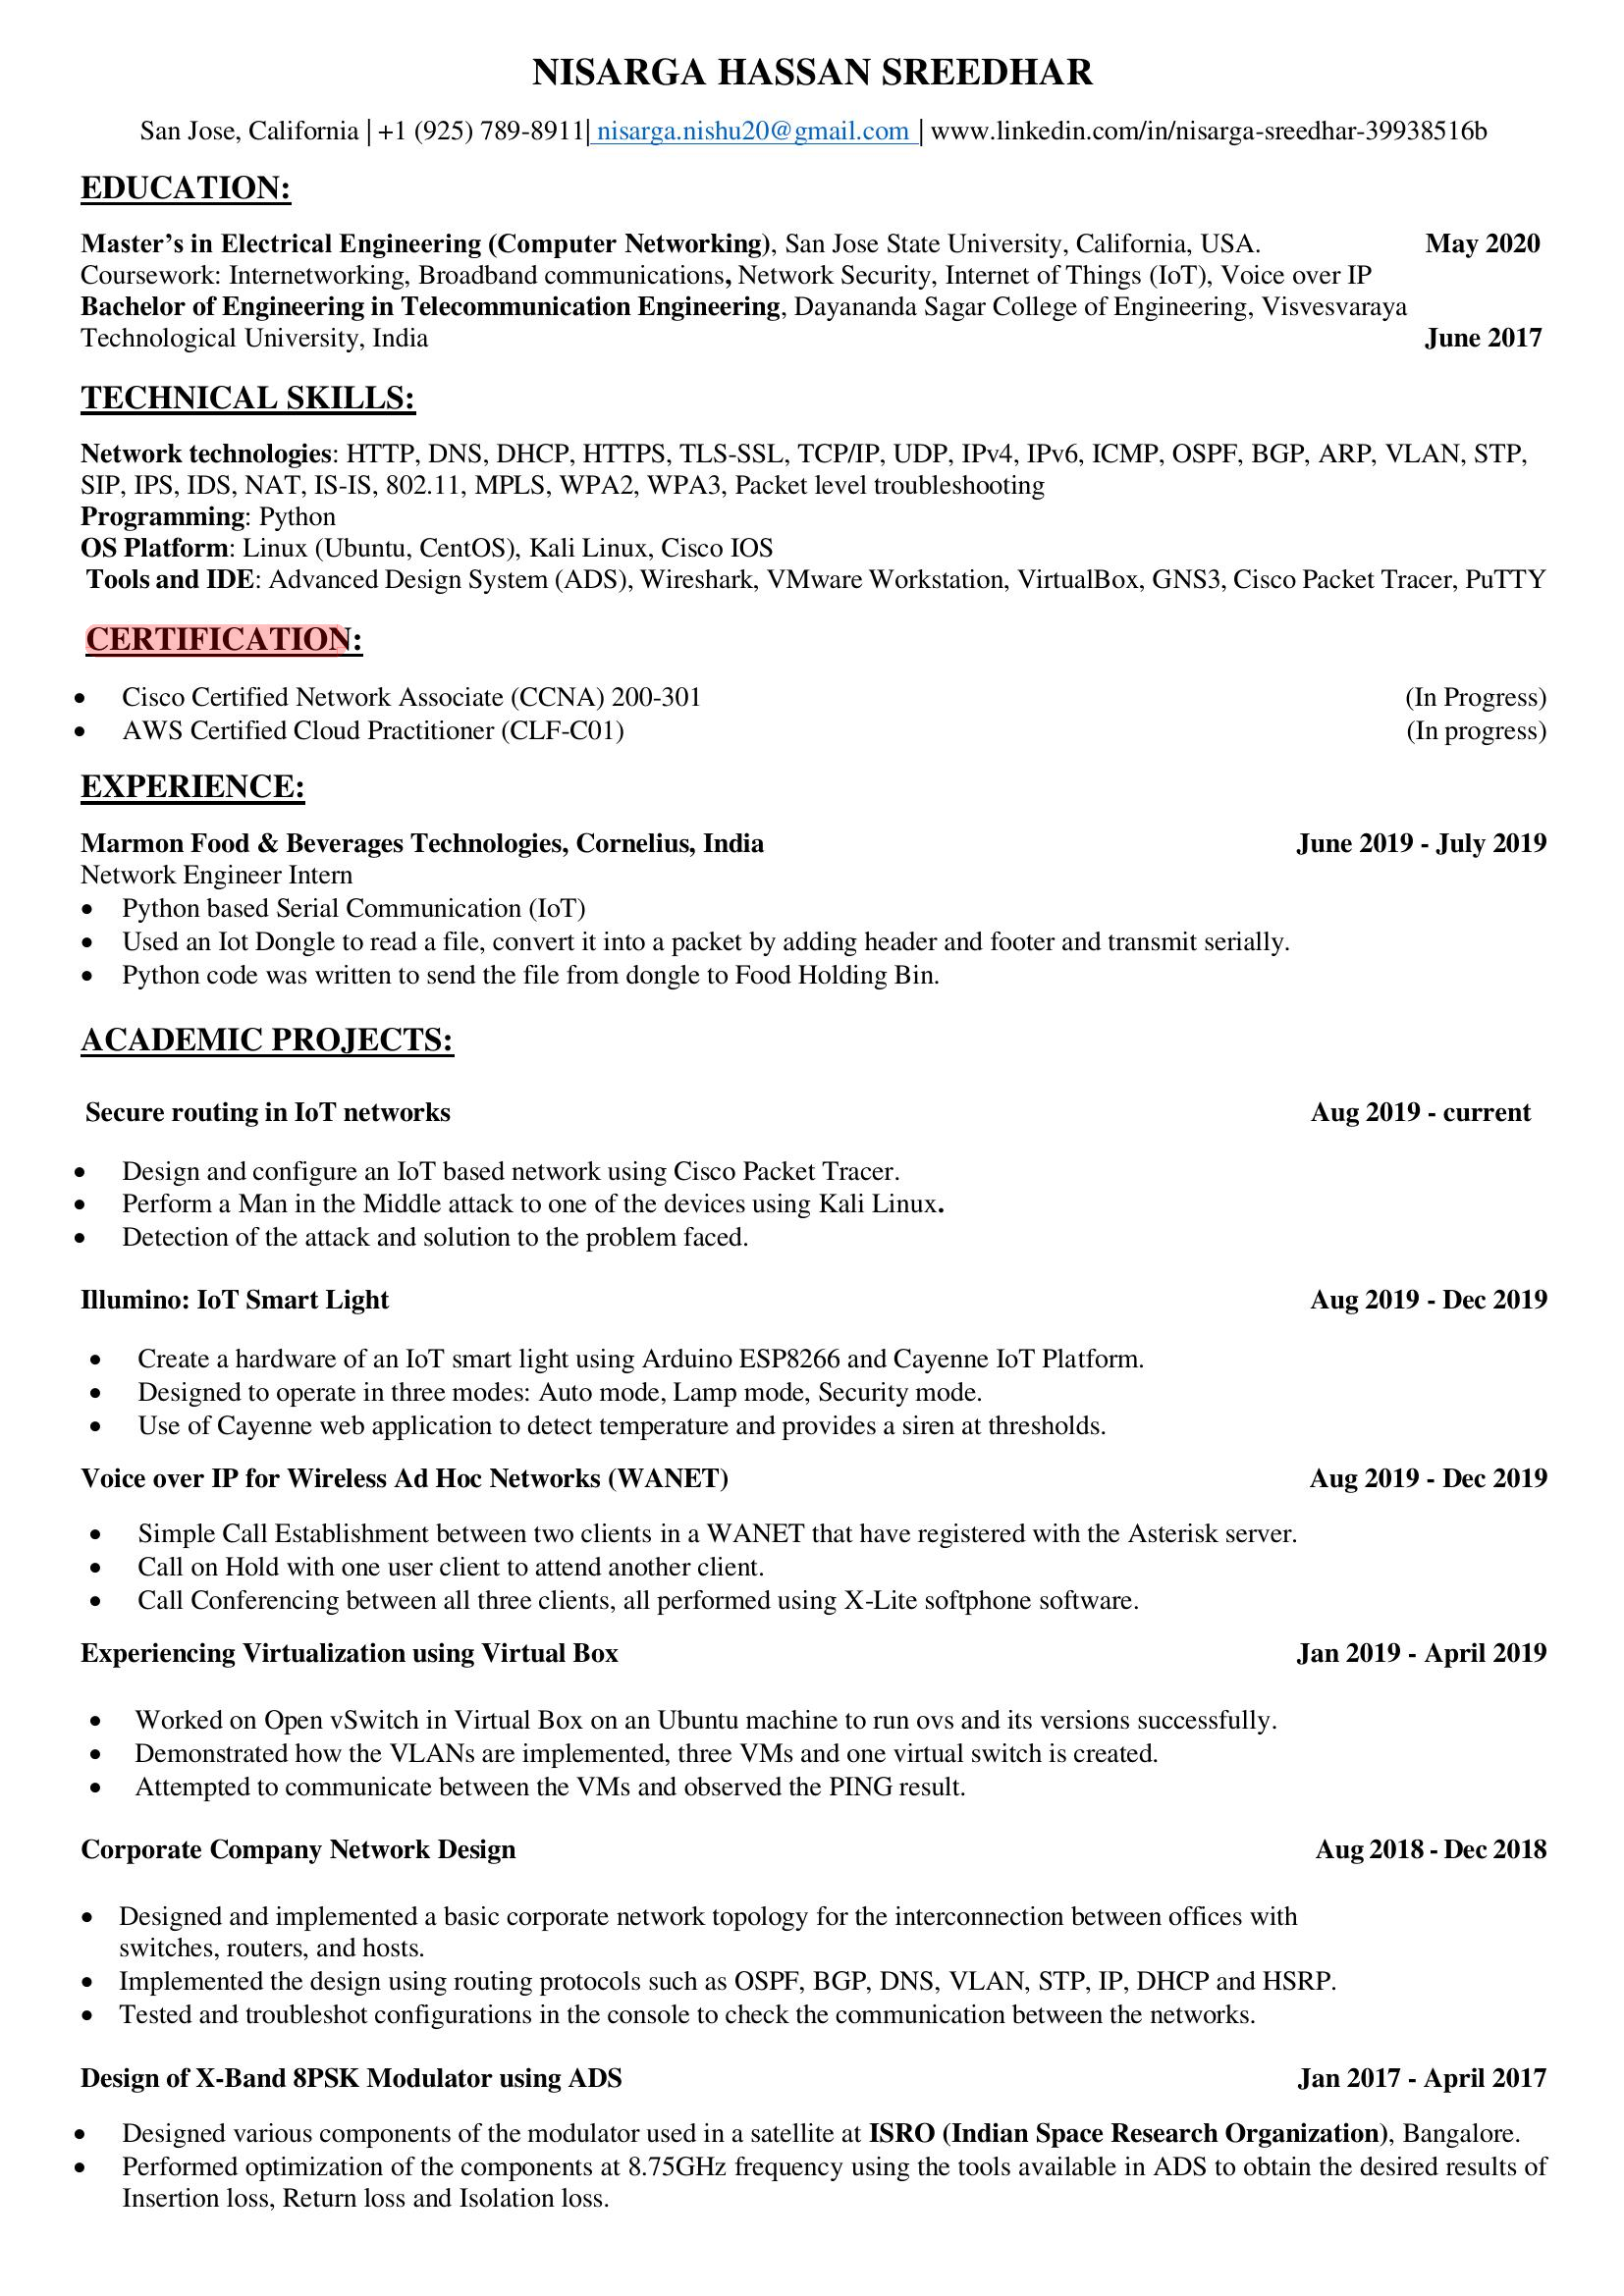

In [34]:
imagePath = "/Users/kunal/Documents/VdartResumeProject/VisionAPi/Document_402_1.jpg"
shadeCuveredRectangle(((87, 636), (353, 636), (353, 669), (87, 669)), (255,0,0), imagePath)

# Multi Curved Rectangles

In [35]:
lstMatrixes = [((518, 54), (707, 54), (707, 94), (518, 94)), ((719, 54), (958, 54), (958, 94), (719, 94)), 
                ((1093, 54), (1181, 54), (1181, 94), (1093, 94)), ((518, 54), (707, 54), (707, 94), (518, 94)), 
                ((87, 636), (353, 636), (353, 669), (87, 669)), ((995, 54), (1063, 54), (1063, 94), (995, 94))]

In [36]:
def shadeCuveredRectangleMultiImg(matrixLst, shadeColor, imgPath):
    TRANSPARENCY = 0.25
    OPACITY = int(255 * TRANSPARENCY)
    imagePath = imgPath
    img = Image.open(imagePath)
    img = img.convert("RGBA")
    overlay = Image.new('RGBA', img.size, shadeColor+(0,))
    draw = ImageDraw.Draw(overlay)  # Create a context for drawing things on it.
    
    radius=13
    
    for matrix in matrixLst:
        box1, box2, box3 = pastMatrixonImg(matrix, radius)
        draw.polygon(box1, fill=shadeColor+(OPACITY,))
        draw.polygon(box2, fill=shadeColor+(OPACITY,))
        draw.polygon(box3, fill=shadeColor+(OPACITY,))
        
        widthBox = matrix[1][0]-matrix[0][0]
        heightBox = matrix[2][1]-matrix[0][1]
        position = (matrix[0])
        rectangle = create4curvedCorners(widthBox, heightBox, radius, shadeColor, TRANSPARENCY)
        img.paste(rectangle, position, mask=rectangle)

    img = Image.alpha_composite(img, overlay)
    img = img.convert("RGB") # Remove alpha for saving in jpg format.
    return img

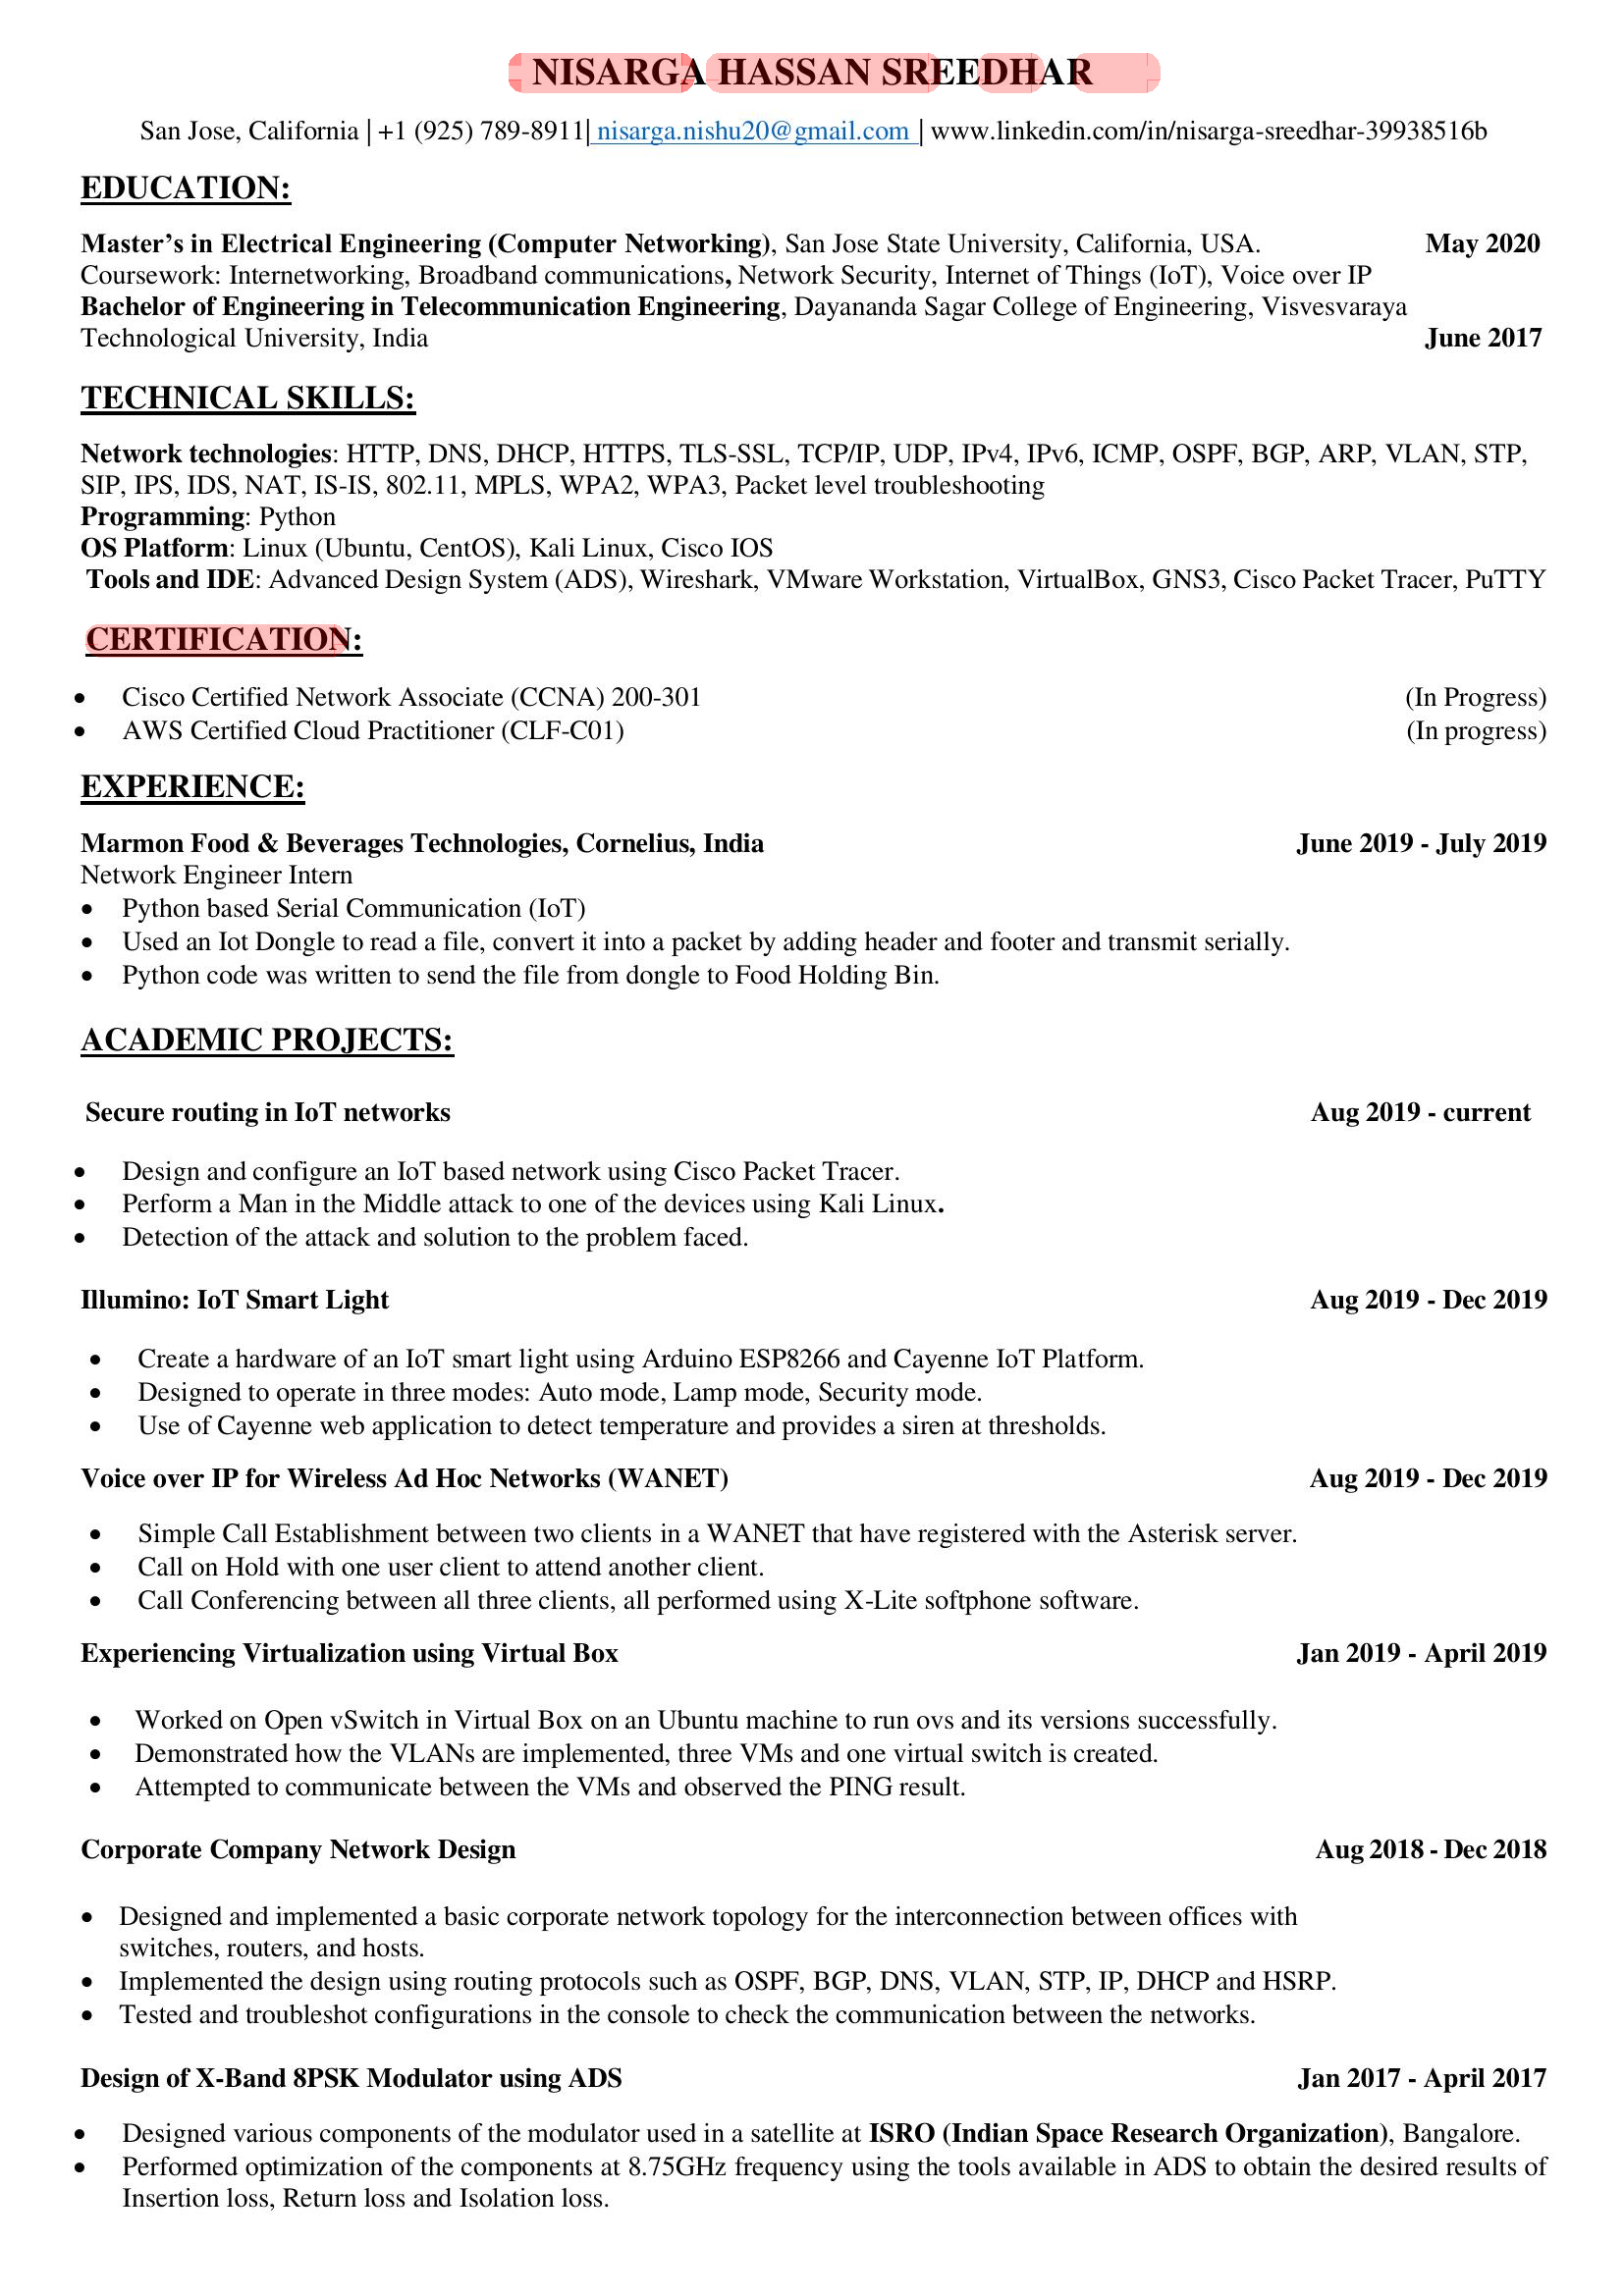

In [37]:
shadeCuveredRectangleMultiImg(lstMatrixes, (255,0,0), imagePath)

# Other

In [38]:
# Reading the required image in
# which operations are to be done.
# Make sure that the image is in the same
# directory in which this python program is
img = cv2.imread(imgPath)

In [ ]:
# Convert the img to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply edge detection method on the image
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# This returns an array of r and theta values
lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

In [ ]:
# The below for loop runs till r and theta values
# are in the range of the 2d array
for r, theta in lines[0]:

    # Stores the value of cos(theta) in a
    a = np.cos(theta)

    # Stores the value of sin(theta) in b
    b = np.sin(theta)

    # x0 stores the value rcos(theta)
    x0 = a * r

    # y0 stores the value rsin(theta)
    y0 = b * r

    # x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
    x1 = int(x0 + 1000 * (-b))

    # y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
    y1 = int(y0 + 1000 * (a))

    # x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
    x2 = int(x0 - 1000 * (-b))

    # y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
    y2 = int(y0 - 1000 * (a))

    # cv2.line draws a line in img from the point(x1,y1) to (x2,y2).
    # (0,0,255) denotes the colour of the line to be
    #drawn. In this case, it is red.
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

# All the changes made in the input image are finally
# written on a new image houghlines.jpg
#cv2.imshow('linesDetected.jpg', img)

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
import cv2

In [ ]:
img = cv2.imread(imgPath)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

In [ ]:
low_threshold = 50
high_threshold = 125
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

In [ ]:
rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 15  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 50  # minimum number of pixels making up a line
max_line_gap = 20  # maximum gap in pixels between connectable line segments
line_image = np.copy(img) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)

In [ ]:
# Draw the lines on the  image
lines_edges = cv2.addWeighted(img, 0.8, line_image, 1, 0)

In [ ]:
plt.imshow(lines_edges)
plt.show()

In [ ]:
cv2.imshow('linesDetected', lines_edges)
cv2.waitKey(0)

In [ ]:
cv2.destroyAllWindows()

In [ ]:
import cv2
img = cv2.imread(imgPath,0)

#Create default Fast Line Detector (FSD)
fld = cv2.ximgproc.createFastLineDetector()

#Detect lines in the image
lines = fld.detect(img)

#Draw detected lines in the image
drawn_img = fld.drawSegments(img,lines)

#Show image
cv2.imshow("FLD", drawn_img)
cv2.waitKey(0)

In [ ]:
cv2.destroyAllWindows()

In [ ]:
import numpy as np
import cv2

gray = cv2.imread(imgPath)
edges = cv2.Canny(gray,20,80,apertureSize = 3)
cv2.imwrite('edges-50-150.jpg',edges)
minLineLength=100
lines = cv2.HoughLinesP(image=edges,rho=1,theta=np.pi/180, threshold=100,lines=np.array([]), minLineLength=minLineLength,maxLineGap=30)


In [ ]:

a,b,c = lines.shape
for i in range(a):
    cv2.line(gray, (lines[i][0][0], lines[i][0][1]), (lines[i][0][2], lines[i][0][3]), (0, 0, 255), 1)
    

In [ ]:
lines

In [ ]:
cv2.imshow('houghlines5.jpg',gray)
cv2.waitKey(0)
cv2.destroyAllWindows()